# <center>**ANALYSIS OF COVID-19 IN SOUTH AMERICA**</center>

***
- - -

The aim of this project is to find out how SARS-CoV-2 (Covid-19) affected the south american region of the world. Some of the essential questions for developing this project are related to the number of cases on every country of the region, the number of deceased, the number of people vaccinated and the brand of the vaccines distributed.

The data used for the analysis has been aqcuired from the covid-dateset csv pointed at https://github.com/owid/covid-19-data/tree/master/public/data. It contains a collection of the COVID-19 data maintained by Our World in Data, from February 2020 up to September 2022, and collects information from 218 countries from around the world. The information outside the scope of this project was despised.

The tools used to handle the data were the packages `Numpy` and `Pandas`, and for visualization, the packages used were `Matplotlib` and `Seaborn`.

***
- - -

### <center>**TABLE OF CONTENTS**</center>

#### **1. Imports and reading dataset.**
In this step the packages used for the analysis are imported, and the dataset is loaded for further analysis.

#### **2. Data preparation: Wrangling**
Data wrangling, sometimes referred to as data munging, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics. The goal of data wrangling is to assure quality and useful data.
In this step problems like missing, invalid, and inconsistent values have been addressed.

#### **3. Exploratory Data Analysis (EDA) and Visualization.**
In this step the dataset is analyzed to perform initial investigations to discover patterns, spot anomalies, to test hypotesis and to check assumptions with the help of summary statistics and graphical representations.
The distribution, correlation, relationship, composition and comparison of the data is addressed in this step.

#####   **3.1. Quantitive and qualitative analysis: Asking and Answering Questions.**
1. algo1
2. algo2
3. algo3
4. algo4

#### **4. Presentation of findings: Conclusions.**
In this step the most significants insights are presented.



***
- - -

###  **1. Imports and Reading Dataset.**


First we have to import the libraries and packages used for the project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('ggplot')

# Use `plotly` for the plotting backend
# pd.options.plotting.backend = "plotly"

Then, with the pandas function `pd.read_csv()`, we open and read the comma-separated value (CSV) file used as the "raw" dataframe.

In [2]:
# Disclaimer: This website is updated every day. Some information can vary along the time.
df_raw = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

We can verify that the file has DataFrame type with `type()` function.

In [3]:
type(df_raw)

pandas.core.frame.DataFrame

***
- - -

### **2. Data Preparation: Wrangling/Munging.**


We can verify the number of rows and columns of the dataframe with `df.shape` (rows, columns)

In [4]:
print(f'The raw dataset contains {df_raw.shape[0]:,} rows and {df_raw.shape[1]} columns')

The raw dataset contains 215,858 rows and 67 columns


With `head` we can observe the first five rows of the dataframe, and with `tail` we can observe the last five rows of the dataframe.

In [5]:
df_raw.head() 
# we can adjust the displayed number of rows by typing the desired number inside the parenthesis.

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [6]:
df_raw.tail()
# we can adjust the displayed number of rows by typing the desired number inside the parenthesis.

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
215853,ZWE,Africa,Zimbabwe,2022-09-08,256834.0,9.0,13.714,5596.0,0.0,0.0,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
215854,ZWE,Africa,Zimbabwe,2022-09-09,256859.0,25.0,16.429,5596.0,0.0,0.0,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
215855,ZWE,Africa,Zimbabwe,2022-09-10,256870.0,11.0,16.429,5596.0,0.0,0.0,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
215856,ZWE,Africa,Zimbabwe,2022-09-11,256870.0,0.0,15.286,5596.0,0.0,0.0,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
215857,ZWE,Africa,Zimbabwe,2022-09-12,256888.0,18.0,17.000,5596.0,0.0,0.0,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


With `df.dtypes` we can see the type of data inside every row.

In [7]:
df_raw.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

With `df.describe()` we can generate descriptive statistics.

In [8]:
df_raw.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.069440e+05,2.066720e+05,2.054900e+05,1.881140e+05,188037.000000,186859.000000,205995.000000,205723.000000,204546.000000,187178.000000,...,134087.000000,132250.000000,87072.000000,157499.000000,201638.000000,172692.000000,7.146000e+03,7146.000000,7189.000000,7146.000000
mean,4.118879e+06,1.256805e+04,1.260937e+04,7.169766e+04,143.869212,144.633636,54872.876025,188.760167,189.262791,664.666561,...,10.656130,32.804004,50.851900,3.083970,73.636434,0.724903,4.567256e+04,9.727418,14.604108,1256.030346
std,2.580349e+07,8.659098e+04,8.467726e+04,3.700175e+05,746.917041,732.399718,98890.607730,942.774165,620.560335,952.159629,...,10.599622,13.536135,31.842357,2.550521,7.447611,0.149696,1.269947e+05,13.746641,26.965277,1668.272255
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1884.678982
25%,3.864000e+03,0.000000e+00,6.571000e+00,1.080000e+02,0.000000,0.143000,975.307000,0.000000,1.450000,28.109000,...,1.900000,21.600000,20.859000,1.300000,69.500000,0.602000,1.765000e+01,0.260000,-0.280000,11.100572
50%,4.527550e+04,6.100000e+01,9.928600e+01,1.099000e+03,1.000000,1.714000,9286.548000,8.550000,20.194500,196.351000,...,6.300000,31.400000,49.839000,2.500000,75.050000,0.743000,5.321250e+03,7.275000,7.230000,706.249704
75%,4.877282e+05,9.950000e+02,1.156143e+03,9.370000e+03,15.000000,16.571000,66547.083000,100.959000,137.567250,987.840250,...,19.300000,41.300000,82.502000,4.000000,79.070000,0.845000,3.270655e+04,15.360000,20.390000,1969.750062
max,6.090313e+08,4.081701e+06,3.436129e+06,6.515452e+06,17737.000000,14858.143000,655309.333000,195005.313000,35258.843000,6411.033000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.220577e+06,76.550000,376.180000,9750.477354


In [9]:
# we can use all rows and values for a more in deep description.
df_raw.describe(include='all')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,215858,203419,215858,215858,2.069440e+05,2.066720e+05,2.054900e+05,1.881140e+05,188037.000000,186859.000000,...,134087.000000,132250.000000,87072.000000,157499.000000,201638.000000,172692.000000,7.146000e+03,7146.000000,7189.000000,7146.000000
unique,244,6,244,986,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ARG,Africa,Argentina,2021-11-15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,986,49923,986,243,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,4.118879e+06,1.256805e+04,1.260937e+04,7.169766e+04,143.869212,144.633636,...,10.656130,32.804004,50.851900,3.083970,73.636434,0.724903,4.567256e+04,9.727418,14.604108,1256.030346
std,NaN,NaN,NaN,NaN,2.580349e+07,8.659098e+04,8.467726e+04,3.700175e+05,746.917041,732.399718,...,10.599622,13.536135,31.842357,2.550521,7.447611,0.149696,1.269947e+05,13.746641,26.965277,1668.272255
min,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1884.678982
25%,NaN,NaN,NaN,NaN,3.864000e+03,0.000000e+00,6.571000e+00,1.080000e+02,0.000000,0.143000,...,1.900000,21.600000,20.859000,1.300000,69.500000,0.602000,1.765000e+01,0.260000,-0.280000,11.100572
50%,NaN,NaN,NaN,NaN,4.527550e+04,6.100000e+01,9.928600e+01,1.099000e+03,1.000000,1.714000,...,6.300000,31.400000,49.839000,2.500000,75.050000,0.743000,5.321250e+03,7.275000,7.230000,706.249704
75%,NaN,NaN,NaN,NaN,4.877282e+05,9.950000e+02,1.156143e+03,9.370000e+03,15.000000,16.571000,...,19.300000,41.300000,82.502000,4.000000,79.070000,0.845000,3.270655e+04,15.360000,20.390000,1969.750062


As we can observe, the dataset contains a lot more information than the one needed for this project. In order to proceed, we need to adjust and reshape the dataframe.

In [10]:
# with value_counts() we can count the times a value repeats inside the column desired.
df_raw.value_counts('continent')

continent
Africa           49923
Europe           46752
Asia             46403
North America    33244
Oceania          15097
South America    12000
dtype: int64

To adjust the dataframe to our needs, we take a slice of the full dataset: 

In [11]:
# We define our new dataframe with the rows where continent == 'South America'.
df = df_raw.loc[df_raw['continent'] == 'South America'].reset_index(drop=True).copy()
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,ARG,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
1,ARG,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
2,ARG,South America,Argentina,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
3,ARG,South America,Argentina,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
4,ARG,South America,Argentina,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,VEN,South America,Venezuela,2022-09-08,543204.0,0.0,99.429,5804.0,0.0,1.143,...,NaN,NaN,NaN,0.8,72.06,0.711,NaN,NaN,NaN,NaN
11996,VEN,South America,Venezuela,2022-09-09,543204.0,0.0,99.429,5804.0,0.0,1.143,...,NaN,NaN,NaN,0.8,72.06,0.711,NaN,NaN,NaN,NaN
11997,VEN,South America,Venezuela,2022-09-10,543759.0,555.0,126.429,5807.0,3.0,1.286,...,NaN,NaN,NaN,0.8,72.06,0.711,NaN,NaN,NaN,NaN
11998,VEN,South America,Venezuela,2022-09-11,543811.0,52.0,133.857,5809.0,2.0,1.571,...,NaN,NaN,NaN,0.8,72.06,0.711,NaN,NaN,NaN,NaN


In [12]:
print(f'The new dataset contains {df.shape[0]:,} rows and {df.shape[1]} columns')

The new dataset contains 12,000 rows and 67 columns


Now, let's see some additional information of our new dataframe. 

In [13]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.193700e+04,11912.000000,11839.000000,10885.000000,10866.000000,10805.000000,11937.000000,11912.000000,11839.000000,10885.000000,...,8364.000000,7443.000000,5511.000000,11108.000000,12000.000000,11108.000000,637.000000,637.000000,637.000000,637.000000
mean,2.237484e+06,5342.419577,5365.390900,65748.817271,119.901712,120.449928,58042.052665,179.439720,180.307084,1474.751225,...,11.002929,24.684979,66.023570,2.085852,75.584625,0.763829,80969.402198,31.371711,32.335934,2244.166973
std,5.394866e+06,15191.753269,14193.503759,134370.783796,317.041307,300.007578,72087.382257,2121.908657,877.164501,1429.590052,...,9.341174,11.030237,19.037082,1.108197,3.339704,0.050878,113502.836288,22.126068,44.916652,1702.876626
min,1.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.005000,0.000000,0.000000,0.005000,...,2.000000,12.300000,25.383000,0.800000,69.910000,0.682000,-8805.400000,-8.230000,-21.950000,-716.524724
25%,2.193600e+04,12.000000,74.429000,1198.000000,1.000000,2.286000,8823.446000,3.714250,18.629000,203.370000,...,4.800000,17.900000,65.386000,1.500000,72.060000,0.728000,16746.000000,14.810000,4.790000,735.133881
50%,3.900370e+05,522.000000,787.714000,13566.000000,13.000000,16.286000,30853.224000,46.307500,65.747000,1226.786000,...,7.400000,21.600000,77.159000,1.710000,76.670000,0.765000,47225.200000,30.610000,16.710000,2139.183624
75%,1.605695e+06,2985.250000,3448.143000,58860.000000,75.000000,79.714000,88175.379000,154.483000,163.701500,2229.050000,...,14.000000,27.700000,79.602000,2.800000,77.290000,0.817000,110113.000000,51.210000,42.590000,3524.992603
max,3.453396e+07,287149.000000,189227.000000,684898.000000,4148.000000,3112.286000,501062.699000,195005.313000,35258.843000,6411.033000,...,34.200000,42.900000,80.635000,5.000000,81.440000,0.851000,801389.500000,76.550000,376.180000,5593.470559


In [14]:
# All the columns of the dataset can be seen here:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

By knowing what every column represents, we can adjust the dataframe to be more suitable for this analysis. (The description of every column can be seen at the github repo cited at the begining. )

In [15]:
# Setting a new dataframe with the desired columns
df_2 = df[['location', 'date', 'total_cases', 'new_cases',
        'total_deaths', 'new_deaths', 'total_vaccinations',
        'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
        'population', 'median_age', 'aged_65_older', 'aged_70_older',
        'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence',
        'female_smokers', 'male_smokers', 'life_expectancy',  'human_development_index'
        ]].copy()

#### **2.1 Working with missing, incorrect and invalid data.**

To avoid possible misleading mathematical operations, we have to take care of the missing, incorrect and invalid data.
Some pandas functions excludes by default NaN values, but other numerical operations don't, so in order to perform a good analysis, is vital to tackle these different types of data according to their case.

In [16]:
df_2.info(max_cols=len(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 12000 non-null  object 
 1   date                     12000 non-null  object 
 2   total_cases              11937 non-null  float64
 3   new_cases                11912 non-null  float64
 4   total_deaths             10885 non-null  float64
 5   new_deaths               10866 non-null  float64
 6   total_vaccinations       4992 non-null   float64
 7   people_vaccinated        4908 non-null   float64
 8   people_fully_vaccinated  4809 non-null   float64
 9   total_boosters           3022 non-null   float64
 10  population               12000 non-null  float64
 11  median_age               11108 non-null  float64
 12  aged_65_older            11108 non-null  float64
 13  aged_70_older            11108 non-null  float64
 14  gdp_per_capita        

If we take a look at the number of non-null elements of each column we can see that many columns, for example the column `total_boosters`, contain several null or NaN values.

In [17]:
df_2.isna().sum().sort_values(ascending=False)

total_boosters             8978
people_fully_vaccinated    7191
people_vaccinated          7092
total_vaccinations         7008
male_smokers               4557
female_smokers             3636
new_deaths                 1134
total_deaths               1115
median_age                  892
aged_65_older               892
aged_70_older               892
gdp_per_capita              892
cardiovasc_death_rate       892
diabetes_prevalence         892
human_development_index     892
new_cases                    88
total_cases                  63
life_expectancy               0
location                      0
date                          0
population                    0
dtype: int64

In [18]:
# observe the columns with the percentage of NaN values
nan_percentage = (df_2.isna().sum()/len(df)*100).sort_values(ascending=False)
nan_percentage

total_boosters             74.816667
people_fully_vaccinated    59.925000
people_vaccinated          59.100000
total_vaccinations         58.400000
male_smokers               37.975000
female_smokers             30.300000
new_deaths                  9.450000
total_deaths                9.291667
median_age                  7.433333
aged_65_older               7.433333
aged_70_older               7.433333
gdp_per_capita              7.433333
cardiovasc_death_rate       7.433333
diabetes_prevalence         7.433333
human_development_index     7.433333
new_cases                   0.733333
total_cases                 0.525000
life_expectancy             0.000000
location                    0.000000
date                        0.000000
population                  0.000000
dtype: float64

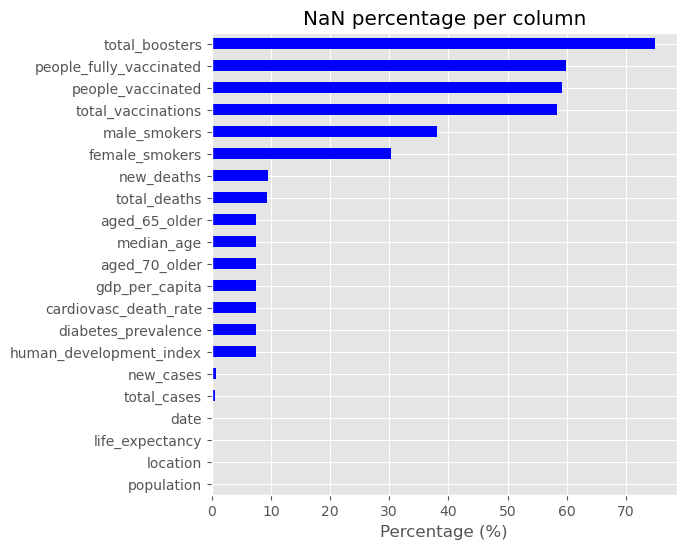

In [19]:
# Next there is a graphic where we can visualize better the percentage of Nan values in every column.
nan_percentage.sort_values(ascending=True) \
.plot(kind='barh',
      title='NaN percentage per column',
      figsize=(6,6),
      color='blue')
plt.xlabel("Percentage (%)")
plt.show()

We still have plenty of NaN values, but we can adjust them to our needs.
For example, the first four columns: `total_boosters`, `people_fully_vaccinated`, `people_vaccinated` and `total_vaccinations` represent the vaccination related data. As we know, vaccines  started to be applied several weeks/months after pandemic began, so is perfectly understood to have null values.

To address this situation, first, we are going to check if theres any negative invalid value inside the dataframe. The presence of any negative number in this specific dataframe it is .

In [20]:
# we define the column types we are going to check
col=df_2.select_dtypes(include=['float64','int64']).columns

negatives = []

for i in col:
    y = any(x < 0 for x in df_2[i])
    if y == True:
        negatives.append(y)
print(f'There are {len(negatives)} negative values in the data frame')

There are 0 negative values in the data frame


We don't need to deal with negative values in this dataframe, so now we can check wich values are zero.

In [21]:
df_2.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
count,1.193700e+04,11912.000000,10885.000000,10866.000000,4.992000e+03,4.908000e+03,4.809000e+03,3.022000e+03,1.200000e+04,11108.000000,11108.000000,11108.000000,11108.000000,11108.000000,11108.000000,8364.000000,7443.000000,12000.000000,11108.000000
mean,2.237484e+06,5342.419577,65748.817271,119.901712,4.987329e+07,2.407111e+07,1.973984e+07,1.224507e+07,3.371187e+07,30.236370,8.297703,5.200749,13879.751918,187.096774,7.793668,11.002929,24.684979,75.584625,0.763829
std,5.394866e+06,15191.753269,134370.783796,317.041307,9.198031e+07,4.280820e+07,3.608751e+07,2.199548e+07,5.489265e+07,3.327576,2.575497,1.982956,4896.790643,71.069758,2.138707,9.341174,11.030237,3.339704,0.050878
min,1.000000e+00,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,3.764000e+03,25.400000,5.305000,2.837000,6885.829000,85.755000,5.500000,2.000000,12.300000,69.910000,0.682000
25%,2.193600e+04,12.000000,1198.000000,1.000000,3.361752e+06,2.285628e+06,1.346455e+06,5.066155e+05,3.426260e+06,28.100000,6.704000,4.229000,10581.936000,140.448000,5.950000,4.800000,17.900000,72.060000,0.728000
50%,3.900370e+05,522.000000,13566.000000,13.000000,1.427236e+07,8.594492e+06,6.078753e+06,2.820673e+06,1.779774e+07,29.600000,7.151000,4.455000,13767.119000,191.032000,6.930000,7.400000,21.600000,76.670000,0.765000
75%,1.605695e+06,2985.250000,58860.000000,75.000000,5.443453e+07,2.517115e+07,2.008056e+07,1.588940e+07,3.371547e+07,32.525000,11.087000,6.938000,18933.907000,204.299000,8.270000,14.000000,27.700000,77.290000,0.817000
max,3.453396e+07,287149.000000,684898.000000,4148.000000,4.712661e+08,1.866744e+08,1.718892e+08,1.181291e+08,2.143262e+08,35.600000,14.655000,10.361000,22767.037000,373.159000,12.540000,34.200000,42.900000,81.440000,0.851000


As we can observe, the columns `new_cases`, `new_deaths`, `total_vaccinations` and `people_vaccinated` have values that are zero. In this case, because we know the meaning of every column, the zero values are not a problem, so we can leave them like that.

Now, we should look for duplicates to delete.

In [22]:
# To watch for duplicates in general:
df_2.loc[df_2.duplicated()]

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index


In [23]:
# We can use a subset to search for a duplicate value within a specified column:
df_2.loc[df_2.duplicated(subset=['location', 'total_cases'])]

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
1,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.9,11.198,7.441,18933.907,191.032,5.50,16.2,27.7,76.67,0.845
2,Argentina,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.9,11.198,7.441,18933.907,191.032,5.50,16.2,27.7,76.67,0.845
3,Argentina,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.9,11.198,7.441,18933.907,191.032,5.50,16.2,27.7,76.67,0.845
4,Argentina,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.9,11.198,7.441,18933.907,191.032,5.50,16.2,27.7,76.67,0.845
5,Argentina,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.9,11.198,7.441,18933.907,191.032,5.50,16.2,27.7,76.67,0.845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11988,Venezuela,2022-09-01,542508.0,0.0,5796.0,0.0,NaN,NaN,NaN,NaN,...,29.0,6.614,3.915,16745.022,204.850,6.47,NaN,NaN,72.06,0.711
11989,Venezuela,2022-09-02,542508.0,0.0,5796.0,0.0,NaN,NaN,NaN,NaN,...,29.0,6.614,3.915,16745.022,204.850,6.47,NaN,NaN,72.06,0.711
11991,Venezuela,2022-09-04,542874.0,0.0,5798.0,0.0,NaN,NaN,NaN,NaN,...,29.0,6.614,3.915,16745.022,204.850,6.47,NaN,NaN,72.06,0.711
11995,Venezuela,2022-09-08,543204.0,0.0,5804.0,0.0,NaN,NaN,NaN,NaN,...,29.0,6.614,3.915,16745.022,204.850,6.47,NaN,NaN,72.06,0.711


It seems that there are duplicated rows inside the dataframe. It could be because the data acquired is presented day by day, so little changes can occur from one day to another. For the porpuse of this project we are going to keep this rows.

So finally we can re-evaluate the NaN values to something that makes sense. For example with the column `total_boosters`, or even with the columns listed before, we can set the NaN values as zero. This method can be used as long as we take this into account when delivering the results of the analysis made.

In [24]:
fill_cols = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations', 'people_vaccinated', 'total_boosters', 'people_fully_vaccinated']

for i in df_2.columns:
    if i in fill_cols:
        df_2[i] = df_2[i].fillna(0)
df_2

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
0,Argentina,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.9,11.198,7.441,18933.907,191.032,5.50,16.2,27.7,76.67,0.845
1,Argentina,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.9,11.198,7.441,18933.907,191.032,5.50,16.2,27.7,76.67,0.845
2,Argentina,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.9,11.198,7.441,18933.907,191.032,5.50,16.2,27.7,76.67,0.845
3,Argentina,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.9,11.198,7.441,18933.907,191.032,5.50,16.2,27.7,76.67,0.845
4,Argentina,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.9,11.198,7.441,18933.907,191.032,5.50,16.2,27.7,76.67,0.845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,Venezuela,2022-09-08,543204.0,0.0,5804.0,0.0,0.0,0.0,0.0,0.0,...,29.0,6.614,3.915,16745.022,204.850,6.47,NaN,NaN,72.06,0.711
11996,Venezuela,2022-09-09,543204.0,0.0,5804.0,0.0,0.0,0.0,0.0,0.0,...,29.0,6.614,3.915,16745.022,204.850,6.47,NaN,NaN,72.06,0.711
11997,Venezuela,2022-09-10,543759.0,555.0,5807.0,3.0,0.0,0.0,0.0,0.0,...,29.0,6.614,3.915,16745.022,204.850,6.47,NaN,NaN,72.06,0.711
11998,Venezuela,2022-09-11,543811.0,52.0,5809.0,2.0,0.0,0.0,0.0,0.0,...,29.0,6.614,3.915,16745.022,204.850,6.47,NaN,NaN,72.06,0.711


In [25]:
# we check again th changes
df_2.isna().sum().sort_values(ascending=False)

male_smokers               4557
female_smokers             3636
human_development_index     892
median_age                  892
diabetes_prevalence         892
cardiovasc_death_rate       892
gdp_per_capita              892
aged_70_older               892
aged_65_older               892
life_expectancy               0
location                      0
date                          0
total_boosters                0
people_fully_vaccinated       0
people_vaccinated             0
total_vaccinations            0
new_deaths                    0
total_deaths                  0
new_cases                     0
total_cases                   0
population                    0
dtype: int64

We still have NaN values, but now we can see a patron in them. 892 of that values could be from the same country, so I have to check.

In [26]:
new_df = df_2.fillna(0)
new_df

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
0,Argentina,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.9,11.198,7.441,18933.907,191.032,5.50,16.2,27.7,76.67,0.845
1,Argentina,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.9,11.198,7.441,18933.907,191.032,5.50,16.2,27.7,76.67,0.845
2,Argentina,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.9,11.198,7.441,18933.907,191.032,5.50,16.2,27.7,76.67,0.845
3,Argentina,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.9,11.198,7.441,18933.907,191.032,5.50,16.2,27.7,76.67,0.845
4,Argentina,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.9,11.198,7.441,18933.907,191.032,5.50,16.2,27.7,76.67,0.845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,Venezuela,2022-09-08,543204.0,0.0,5804.0,0.0,0.0,0.0,0.0,0.0,...,29.0,6.614,3.915,16745.022,204.850,6.47,0.0,0.0,72.06,0.711
11996,Venezuela,2022-09-09,543204.0,0.0,5804.0,0.0,0.0,0.0,0.0,0.0,...,29.0,6.614,3.915,16745.022,204.850,6.47,0.0,0.0,72.06,0.711
11997,Venezuela,2022-09-10,543759.0,555.0,5807.0,3.0,0.0,0.0,0.0,0.0,...,29.0,6.614,3.915,16745.022,204.850,6.47,0.0,0.0,72.06,0.711
11998,Venezuela,2022-09-11,543811.0,52.0,5809.0,2.0,0.0,0.0,0.0,0.0,...,29.0,6.614,3.915,16745.022,204.850,6.47,0.0,0.0,72.06,0.711


In [27]:
# we can inspect the dataframe with df.query()
new_df.query('human_development_index == 0')

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
5612,Falkland Islands,2020-04-04,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
5613,Falkland Islands,2020-04-05,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
5614,Falkland Islands,2020-04-06,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
5615,Falkland Islands,2020-04-07,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
5616,Falkland Islands,2020-04-08,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6499,Falkland Islands,2022-09-08,1886.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
6500,Falkland Islands,2022-09-09,1886.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
6501,Falkland Islands,2022-09-10,1886.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
6502,Falkland Islands,2022-09-11,1886.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0


In [28]:
new_df.query('location == "Falkland Islands"')

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
5612,Falkland Islands,2020-04-04,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
5613,Falkland Islands,2020-04-05,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
5614,Falkland Islands,2020-04-06,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
5615,Falkland Islands,2020-04-07,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
5616,Falkland Islands,2020-04-08,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6499,Falkland Islands,2022-09-08,1886.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
6500,Falkland Islands,2022-09-09,1886.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
6501,Falkland Islands,2022-09-10,1886.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
6502,Falkland Islands,2022-09-11,1886.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0


In [29]:
# count how many times the rows appears in the dataframe
new_df.value_counts('location')

location
Argentina           986
Chile               933
Brazil              930
Ecuador             926
Colombia            921
Peru                921
Paraguay            920
Bolivia             916
Guyana              915
Uruguay             914
Suriname            913
Venezuela           913
Falkland Islands    892
dtype: int64

After comparing both queries and the description obtained after and before the NaN changes, I decided to drop the rows with data from Falkland Islands due to the lack of information in general from that location.

In [30]:
new_df = new_df.loc[~(new_df['location'] == "Falkland Islands")] \
.reset_index(drop=True).copy()
new_df

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index
0,Argentina,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.9,11.198,7.441,18933.907,191.032,5.50,16.2,27.7,76.67,0.845
1,Argentina,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.9,11.198,7.441,18933.907,191.032,5.50,16.2,27.7,76.67,0.845
2,Argentina,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.9,11.198,7.441,18933.907,191.032,5.50,16.2,27.7,76.67,0.845
3,Argentina,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.9,11.198,7.441,18933.907,191.032,5.50,16.2,27.7,76.67,0.845
4,Argentina,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.9,11.198,7.441,18933.907,191.032,5.50,16.2,27.7,76.67,0.845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11103,Venezuela,2022-09-08,543204.0,0.0,5804.0,0.0,0.0,0.0,0.0,0.0,...,29.0,6.614,3.915,16745.022,204.850,6.47,0.0,0.0,72.06,0.711
11104,Venezuela,2022-09-09,543204.0,0.0,5804.0,0.0,0.0,0.0,0.0,0.0,...,29.0,6.614,3.915,16745.022,204.850,6.47,0.0,0.0,72.06,0.711
11105,Venezuela,2022-09-10,543759.0,555.0,5807.0,3.0,0.0,0.0,0.0,0.0,...,29.0,6.614,3.915,16745.022,204.850,6.47,0.0,0.0,72.06,0.711
11106,Venezuela,2022-09-11,543811.0,52.0,5809.0,2.0,0.0,0.0,0.0,0.0,...,29.0,6.614,3.915,16745.022,204.850,6.47,0.0,0.0,72.06,0.711


#### **2.2 Giving format.**

Now, in order to use the column names as properties and take advantage of it, it's necessary to remove some special characters that some column names contain, for example, apostrophe `'`, hyphen `-`, quotation marks `"`, colon `:`, and slash `/`. Also if a column name contains spaces between their words; these spaces will be removed as well.

In this specific case, the column names were normalized by the author of the dataset, so it's not necessary to redo this step.

Just for conveniece, the column `date` will be splitted into `day`, `month`, `year`.

In [31]:
# # we can create a dictionary of lists to store the splitted values
# date = {'day' : [],
#         'month' : [],
#         'year' : []
#         }

# for i in new_df['date']:
#     splitted = i.split("-")
#     date['day'].append(splitted[2])
#     date['month'].append(splitted[1])
#     date['year'].append(splitted[0])

# # we add the new columns to new_df
# new_df['day'] = date['day']
# new_df['month'] = date['month']
# new_df['year'] = date['year']

# # we drop the date column
# new_df.drop('date', axis=1)

***
---

### **3. Exploratory Data Analysis (EDA) and Visualization.**

To find insight from our dataset, we'll explore its variables. This exploratory analysis will help us to understand how the variables interact and how representative they are. In the end, it'll help us to formulate hypotheses to reach the goal of the project and think about future works. 

Let's begin with a description of the information about each column.

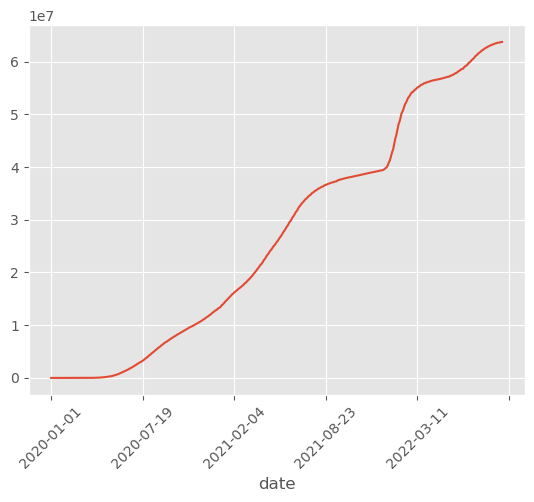

In [45]:
cases_date = new_df.groupby('date')['total_cases'].sum() 

cases_date.plot(kind='line',
                x='date',
                y='total_cases')
plt.xticks(rotation=45, np.arange())
plt.show()

In [ ]:
new_df.describe()

It seems that the difference between 50% and max `total_cases` and `total_deaths` is pretty big. To visualize this better we can create some plots.

In [ ]:
plt.figure(figsize=(16,4))

# we create a df grouping by country and total cases.
max_total_cases_country = pd.DataFrame(new_df.groupby('location')['total_cases']. \
                                max()).sort_values(by='total_cases',ascending=False)

# the location index can be used as a column of the max_total_cases_country df.
max_total_cases_country['location'] = max_total_cases_country.index

# we plot a horizontal bar graph to visualize the max total cases per country
plt.subplot(1,2,1) # figure place
ax = sns.barplot(data=max_total_cases_country,
            x='total_cases',
            y='location',
            palette="light:b_r")
ax.set(xlabel='N˚ of cases', ylabel=' ', title='Total cases per country')



# we create a df grouping by country and total deaths.
max_total_deaths_country = pd.DataFrame(new_df.groupby('location')['total_deaths'] \
                                .max()).sort_values(by='total_deaths', ascending=False)

# the location index can be used as a column of the max_total_deaths_country df.
max_total_deaths_country['location'] = max_total_deaths_country.index

plt.subplot(1,2,2) # figure place
ax = sns.barplot(data=max_total_deaths_country,
            x='total_deaths',
            y='location',
            palette='Reds_r')
ax.set(xlabel='N˚ of deaths', ylabel=' ', title='Total deaths per country')

plt.show()

At first glance, Brazil is by far the country from South America with the biggest number of cases and deaths since january 2020, until september 2022. However, Brazil is also the fifth biggest country in the world. So, to create a better representation to analyze this data, we should use rate of infected per country and rate of death infected per country.

* First I create a new dataframe with the data I want to visualize.

In [ ]:
# pandas serie with population grouped by country
mean_population = new_df.groupby('location')['population'].mean()
mean_population

# new df with the data i want to analyze
new_perc = max_total_deaths_country.copy()
new_perc['population'] = mean_population[:]
new_perc['total_cases'] = max_total_cases_country['total_cases']

# columns with percentage data
new_perc['tc_perc'] = new_perc['total_cases'] / new_perc['population'] * 100
new_perc['td_perc'] = new_perc['total_deaths'] / new_perc['total_cases'] * 100

# # i can add a column to represent the population that survived
# new_perc['survivors'] = new_perc['total_cases'] - new_perc['total_deaths']
# new_perc['surv_perc'] = new_perc['survivors'] / new_perc['total_cases'] * 100
new_perc

* Then, I can create the graphics.

In [ ]:
plt.figure(figsize=(18,4))

plt.subplot(1,2,1)
fig_1 = sns.barplot(data=new_perc. \
sort_values(by='tc_perc',ascending=False),
            x='tc_perc',
            y='location',
            palette='light:b_r',
            orientation='horizontal')
fig_1.set(xlabel='Rate of infected population %',
          ylabel=' ',
          title='Rate of infected population per country')


plt.subplot(1,2,2)
fig_2 = sns.barplot(data=new_perc. \
sort_values(by='td_perc', ascending=False),
            x='td_perc',
            y='location',
            palette='Reds_r',
            orientation='horizontal')
fig_2.set(xlabel='Rate of death population %',
          ylabel=' ',
          title='Rate of death population per country due to Covid-19')

plt.show()

Now we can see that Brazil is not the "worst" from the list of countries analyzed. Despite having the largest total number of Covid-19 cases and deaths, countries like Uruguay, Chile and Argentina were more affected in terms of rate of infections; while Peru, Ecuador and Paraguay were more affected in terms of rate of deaths due to Covid-19. 

Q1: el gdp afecta en la cantidad de enfermos y/o muertos?

Q2: el indice de desarrollo afecta muertes y/o infecciones?

Q3: los paises con mas enfermos cardiacos y fumadores tuvieron mas muertes?

Q4: disminuyeron los nuevos contagios y muertes al aplicar las vacunas?

Q5: 

In [ ]:
new_df.query('gdp_per_capita == 0')